In [1]:
#lets complete the task 1

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pls
import seaborn as sls


In [4]:
data=pd.read_csv("./iris_data/Iris.csv")
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
data.head()
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
print(data.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


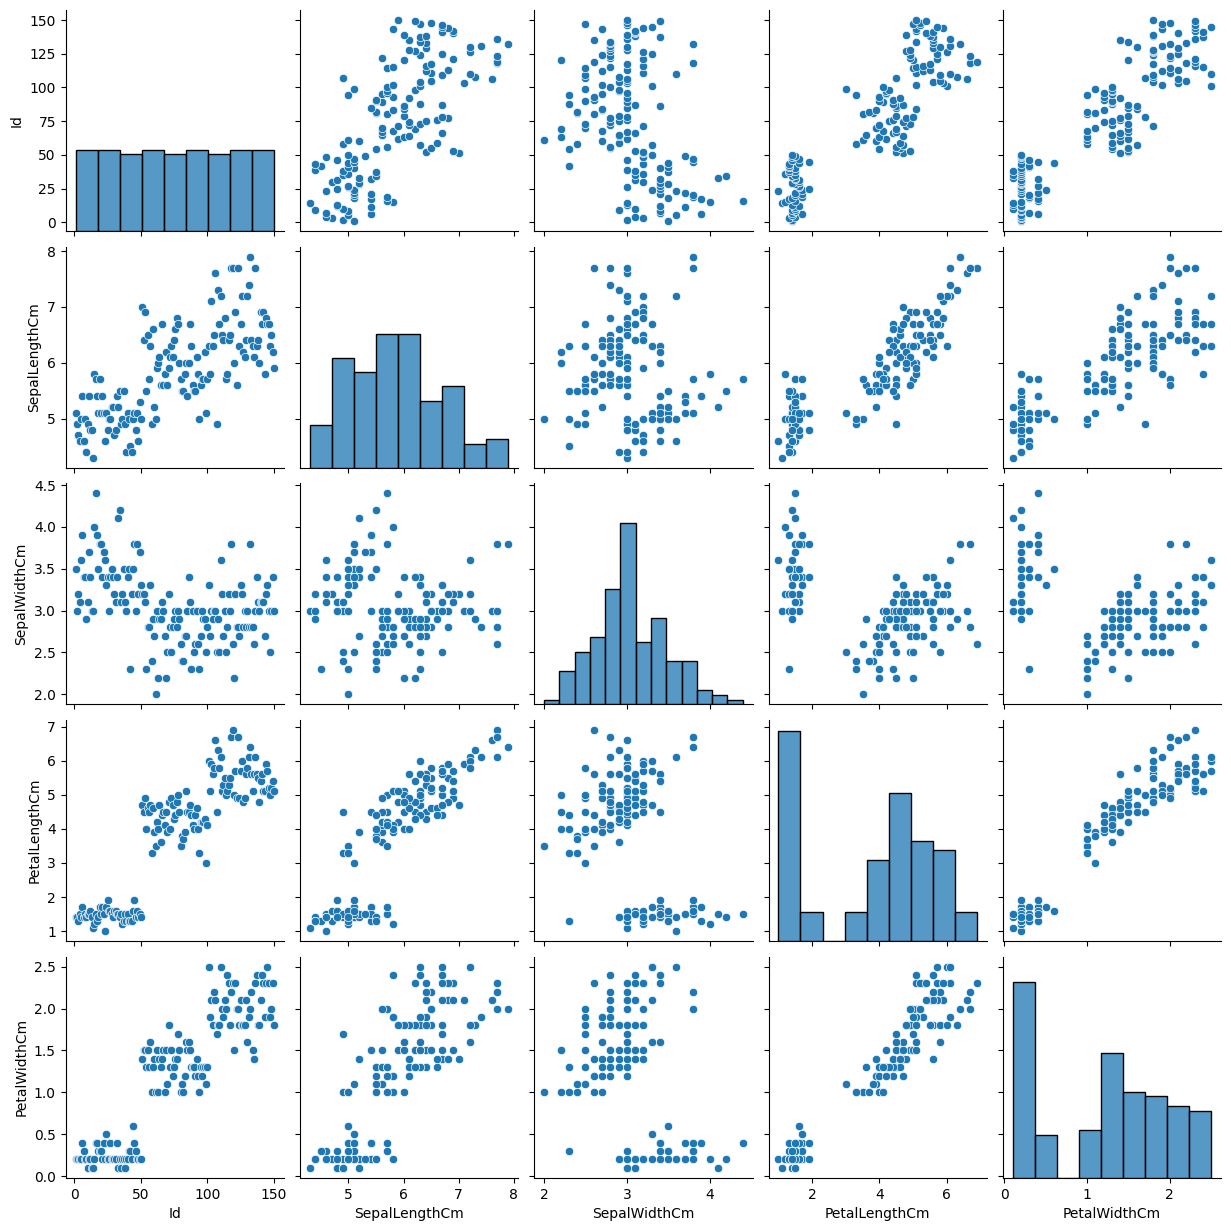

In [14]:
sls.pairplot(data)
pls.show()

In [16]:
df_without_id = data.drop(columns=['id'])
df_without_id.head()

KeyError: "['id'] not found in axis"

In [17]:
data.columname()

AttributeError: 'DataFrame' object has no attribute 'columname'

In [19]:
data.columns
df_without_id = data.drop(columns=['Id'])
df_without_id.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


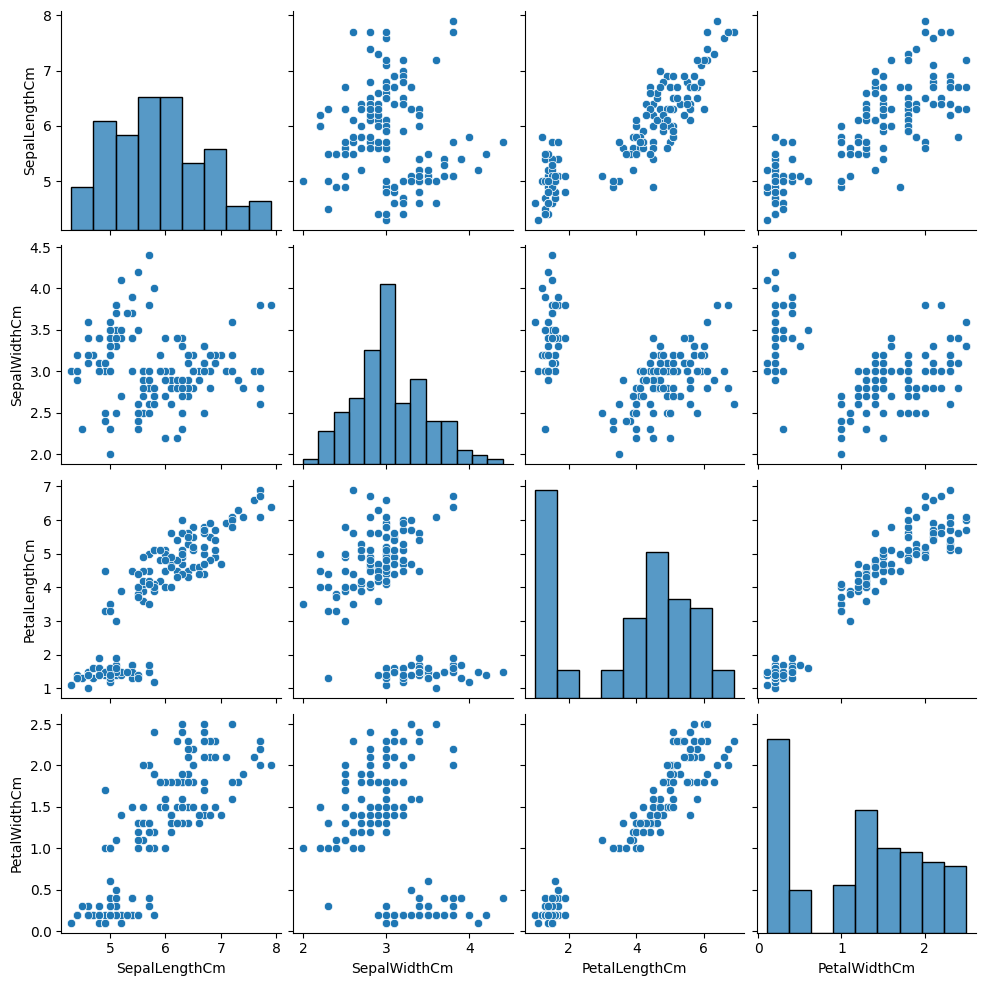

In [21]:
sls.pairplot(df_without_id)
pls.show()

In [26]:
duplicates = df_without_id.duplicated()
print(duplicates.sum())
print(df_without_id[duplicates])

3
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
34             4.9           3.1            1.5           0.1     Iris-setosa
37             4.9           3.1            1.5           0.1     Iris-setosa
142            5.8           2.7            5.1           1.9  Iris-virginica


In [27]:
df_cleaned = df_without_id.drop_duplicates()

In [31]:
from scipy.stats import zscore

# Compute Z-scores for numeric columns
z_scores = df_cleaned[SepalLengthCm].apply(zscore)

# Identify rows with Z-scores greater than 3 or less than -3
outliers_z = (z_scores.abs() > 3).any(axis=1)
print("Rows with outliers (Z-score method):")
print(df_cleaned[outliers_z])


NameError: name 'SepalLengthCm' is not defined

<Axes: ylabel='SepalLengthCm'>

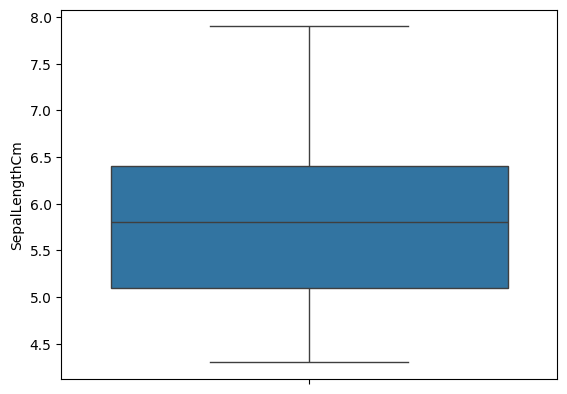

In [32]:
sls.boxplot(df_cleaned['SepalLengthCm'])

<Axes: ylabel='SepalWidthCm'>

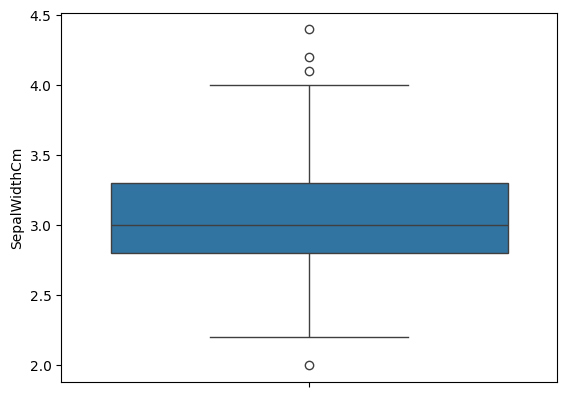

In [35]:
sls.boxplot(df_cleaned['SepalWidthCm'])


<Axes: ylabel='PetalLengthCm'>

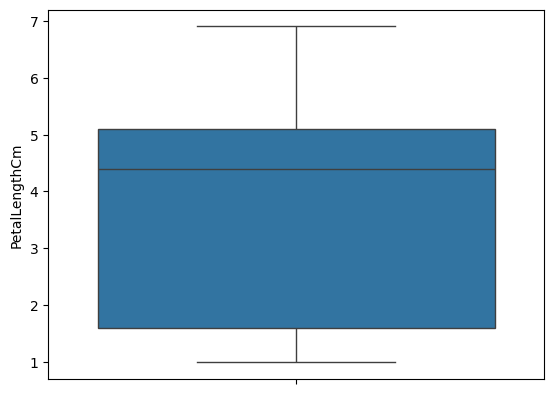

In [36]:
sls.boxplot(df_cleaned['PetalLengthCm'])


<Axes: ylabel='PetalWidthCm'>

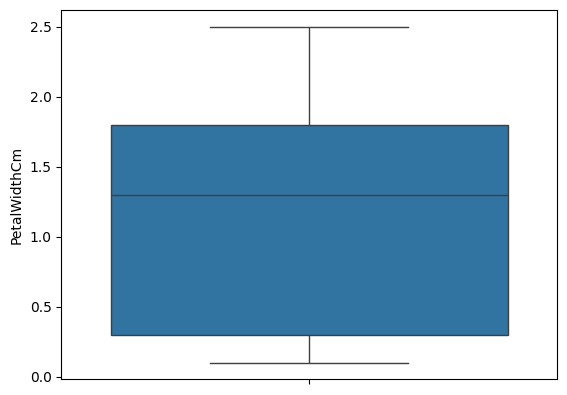

In [37]:

sls.boxplot(df_cleaned['PetalWidthCm'])

In [38]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df_cleaned['SepalWidthCm'].quantile(0.25)
Q3 = df_cleaned['SepalWidthCm'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_cleaned_no_outliers = df_cleaned[(df_cleaned['SepalWidthCm'] >= lower_bound) & 
                                    (df_cleaned['SepalWidthCm'] <= upper_bound)]

# Print the cleaned data
print("Original dataset size:", len(df_cleaned))
print("Cleaned dataset size:", len(df_cleaned_no_outliers))


Original dataset size: 147
Cleaned dataset size: 143


In [39]:
# Rename the DataFrame by assigning it a new variable
cleaneddata =df_cleaned_no_outliers


In [40]:
cleaneddata.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,143.000000,143.000000,143.000000,143.000000
mean,5.870629,3.038462,3.830769,1.230769
std,0.835045,0.398222,1.750824,0.754538
min,4.300000,2.200000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.000000,6.900000,2.500000


In [41]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


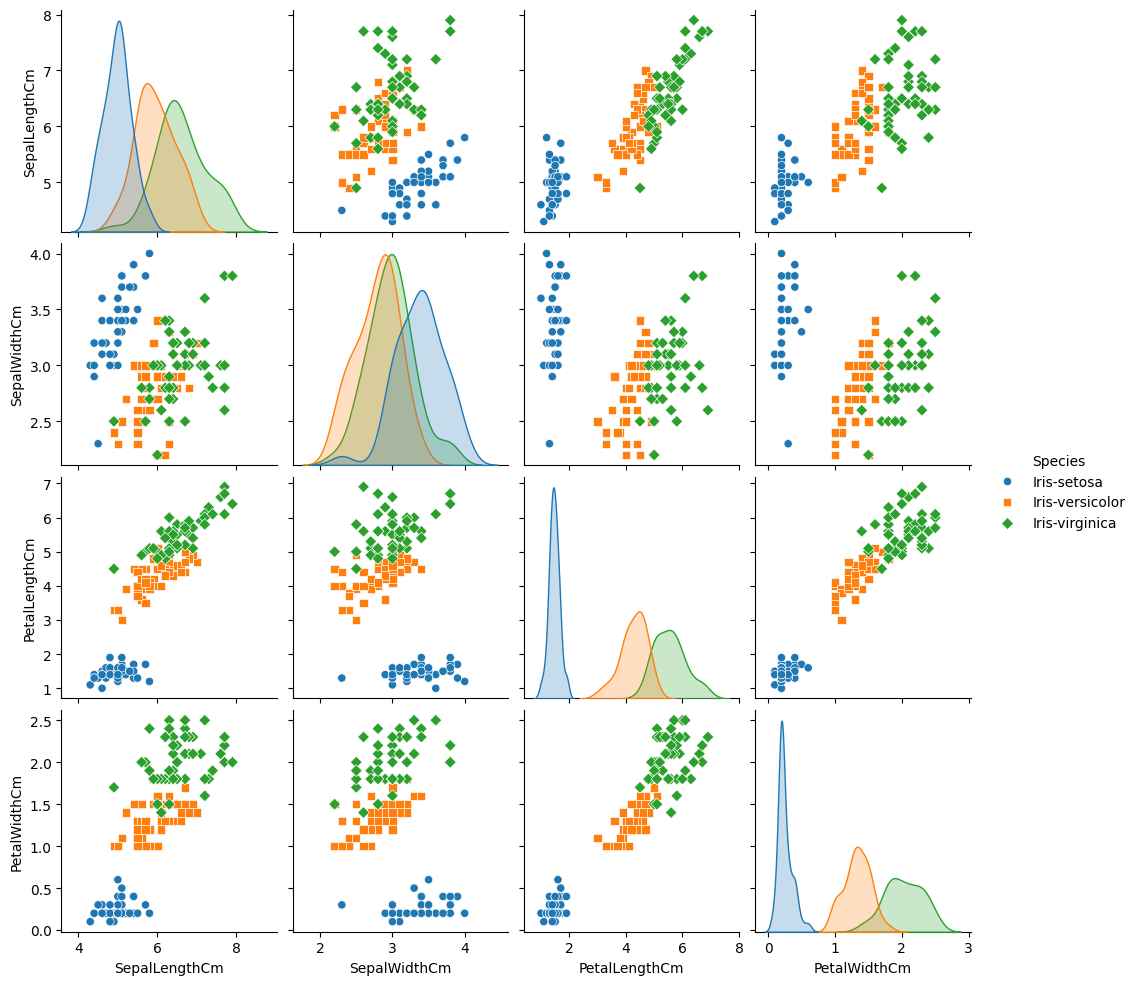

In [44]:
sls.pairplot(cleaneddata, hue='Species', markers=["o", "s", "D"])

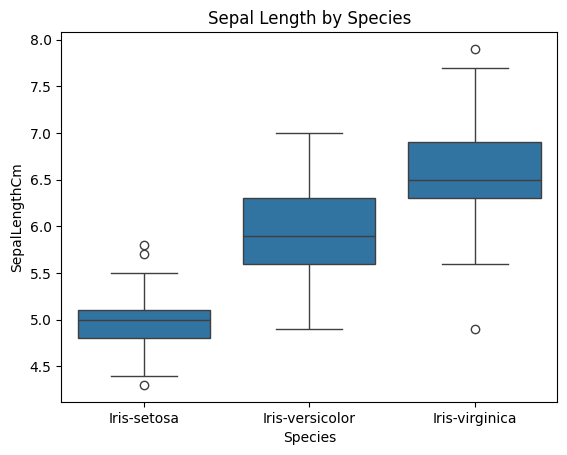

In [48]:
sls.boxplot(data=cleaneddata, x='Species', y='SepalLengthCm')
pls.title('Sepal Length by Species')
pls.show()


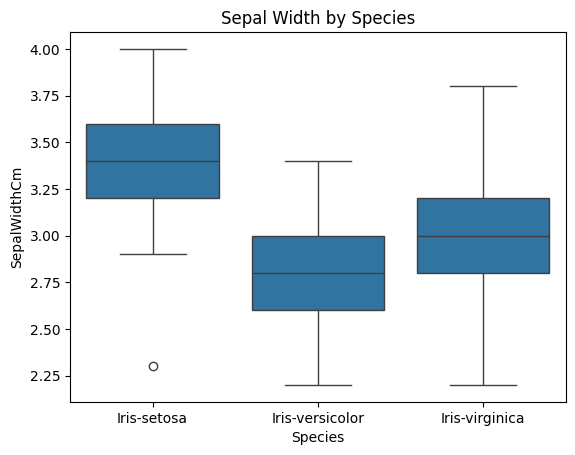

In [52]:
sls.boxplot(data=cleaneddata, x='Species', y='SepalWidthCm')
pls.title('Sepal Width by Species')
pls.show()


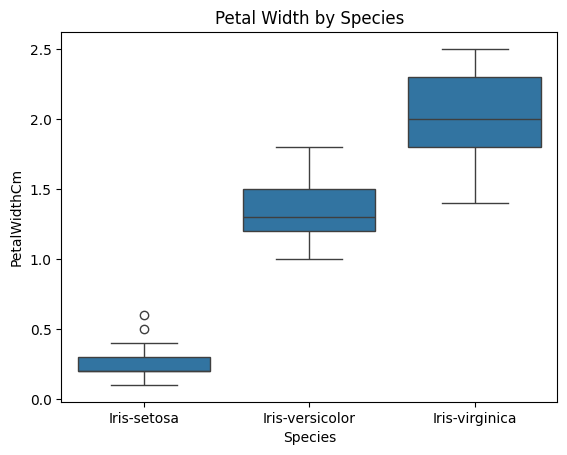

In [53]:
sls.boxplot(data=cleaneddata, x='Species', y='PetalWidthCm')
pls.title('Petal Width by Species')
pls.show()


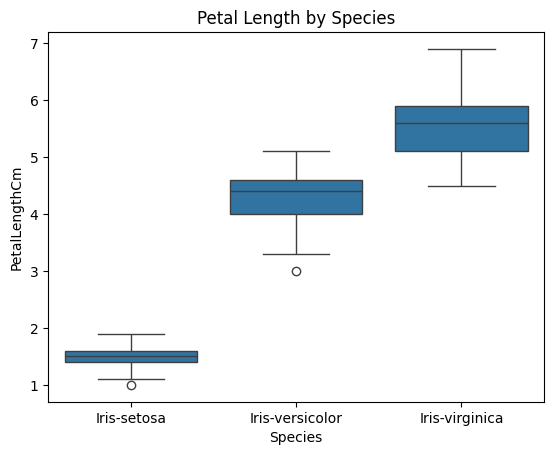

In [54]:
sls.boxplot(data=cleaneddata, x='Species', y='PetalLengthCm')
pls.title('Petal Length by Species')
pls.show()


In [74]:
import pandas as pd

def remove_outliers_for_all_columns(data, columns, species_column):
    clean_data = pd.DataFrame()
    for species in data[species_column].unique():
        species_data = data[data[species_column] == species]
        for column in columns:
            Q1 = species_data[column].quantile(0.25)
            Q3 = species_data[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            # Filter out rows where the column value is outside the bounds
            species_data = species_data[
                (species_data[column] >= lower_bound) & 
                (species_data[column] <= upper_bound)
            ]
        clean_data = pd.concat([clean_data, species_data], axis=0)
    return clean_data

# Define the columns you want to check for outliers
columns_to_check = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

# Remove outliers for all specified columns
cleaneddata_no_outliers = remove_outliers_for_all_columns(cleaneddata, columns_to_check, 'Species')

# Verify the result
print(cleaneddata_no_outliers)


     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[130 rows x 5 columns]


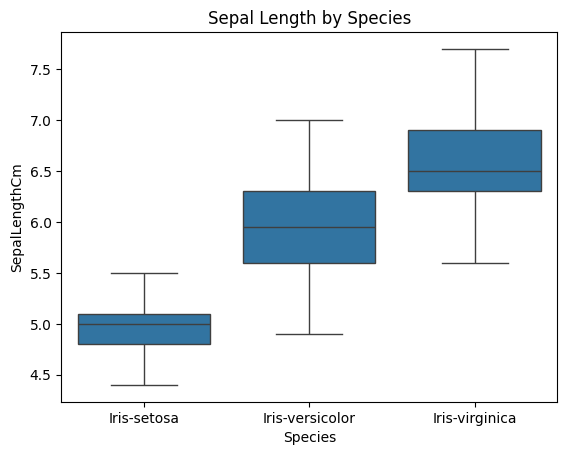

In [75]:
sls.boxplot(data=cleaneddata_no_outliers, x='Species', y='SepalLengthCm')
pls.title('Sepal Length by Species')
pls.show()


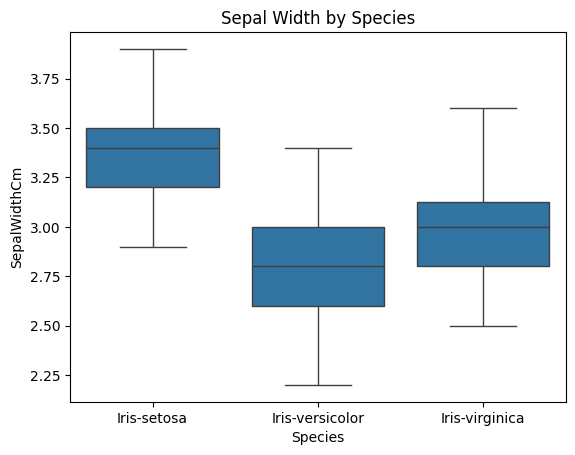

In [79]:
sls.boxplot(data=cleaneddata_no_outliers, x='Species', y='SepalWidthCm')
pls.title('Sepal Width by Species')
pls.show()


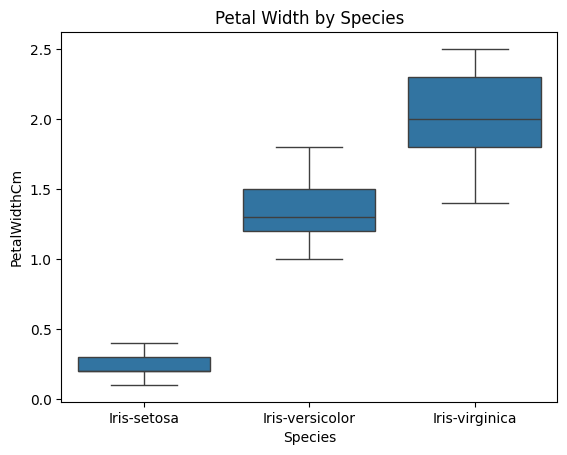

In [80]:
sls.boxplot(data=cleaneddata_no_outliers, x='Species', y='PetalWidthCm')
pls.title('Petal Width by Species')
pls.show()


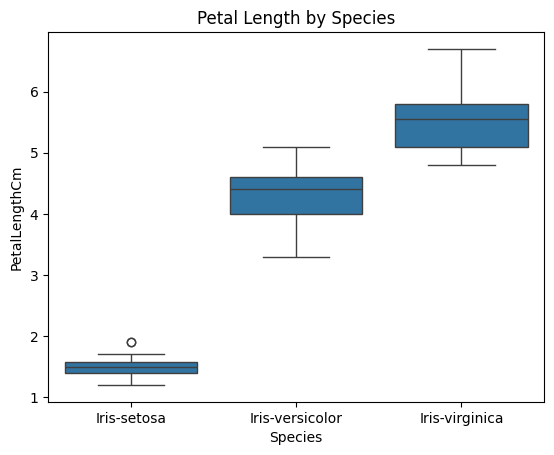

In [81]:
sls.boxplot(data=cleaneddata_no_outliers, x='Species', y='PetalLengthCm')
pls.title('Petal Length by Species')
pls.show()


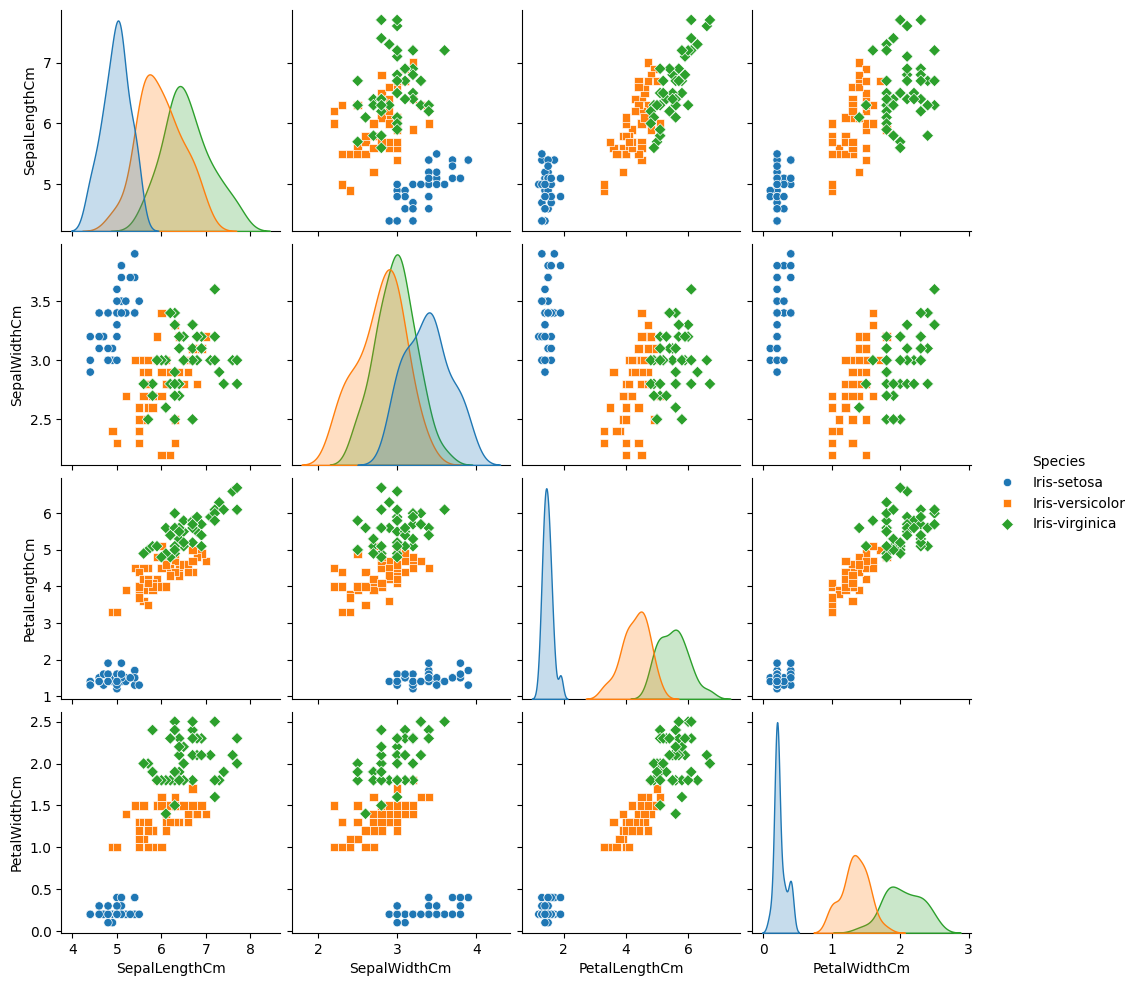

In [83]:
sls.pairplot(cleaneddata_no_outliers, hue='Species', markers=["o", "s", "D"])

In [84]:
finaldata=cleaneddata_no_outliers
finaldata.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [85]:
finaldata.shape

(130, 5)

C:\Users\nanda\AppData\Local\Temp\ipykernel_2888\3233849167.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sls.boxplot(data=cleaneddata_no_outliers, x='Species', y=column, palette='Set3')


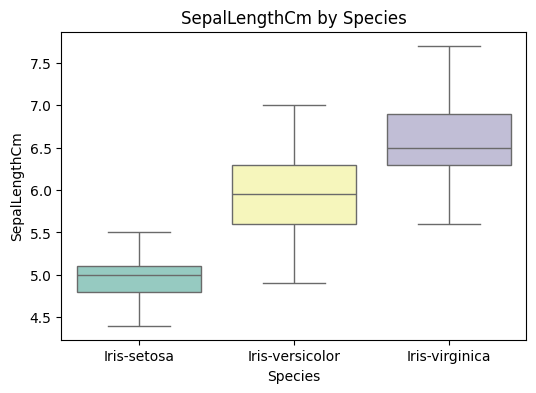

C:\Users\nanda\AppData\Local\Temp\ipykernel_2888\3233849167.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sls.boxplot(data=cleaneddata_no_outliers, x='Species', y=column, palette='Set3')


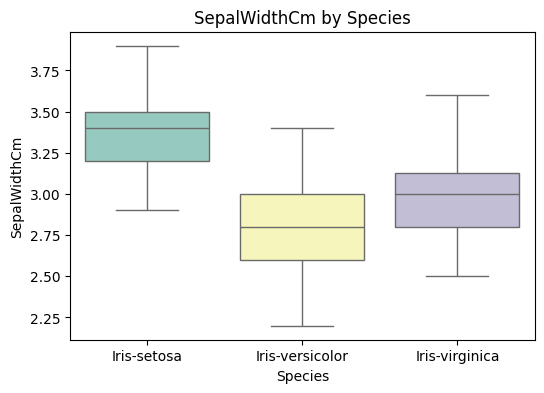

C:\Users\nanda\AppData\Local\Temp\ipykernel_2888\3233849167.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sls.boxplot(data=cleaneddata_no_outliers, x='Species', y=column, palette='Set3')


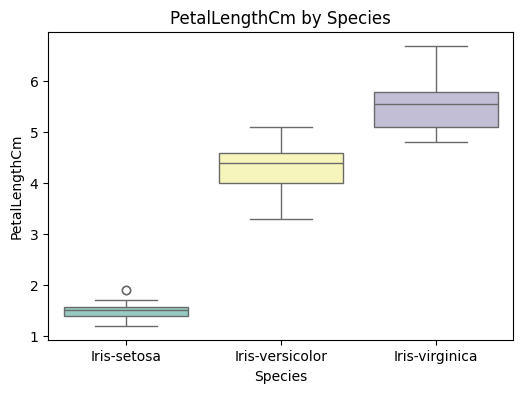

C:\Users\nanda\AppData\Local\Temp\ipykernel_2888\3233849167.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sls.boxplot(data=cleaneddata_no_outliers, x='Species', y=column, palette='Set3')


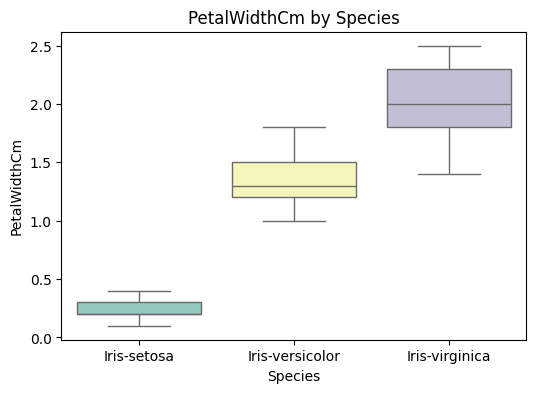

In [89]:
for column in ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']:
    pls.figure(figsize=(6, 4))
    sls.boxplot(data=cleaneddata_no_outliers, x='Species', y=column, palette='Set3')
    pls.title(f'{column} by Species')
    pls.show()


C:\Users\nanda\AppData\Local\Temp\ipykernel_2888\2435968319.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sls.violinplot(data=cleaneddata_no_outliers, x='Species', y=column, palette='muted')


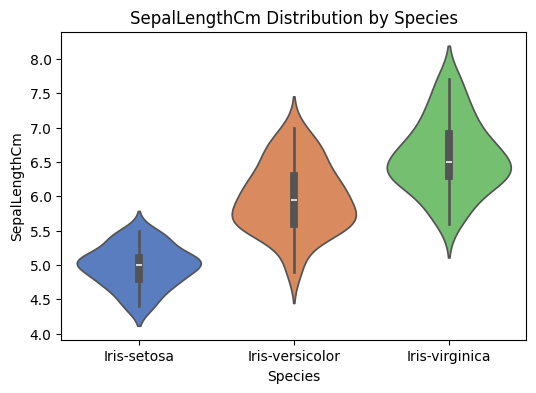

C:\Users\nanda\AppData\Local\Temp\ipykernel_2888\2435968319.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sls.violinplot(data=cleaneddata_no_outliers, x='Species', y=column, palette='muted')


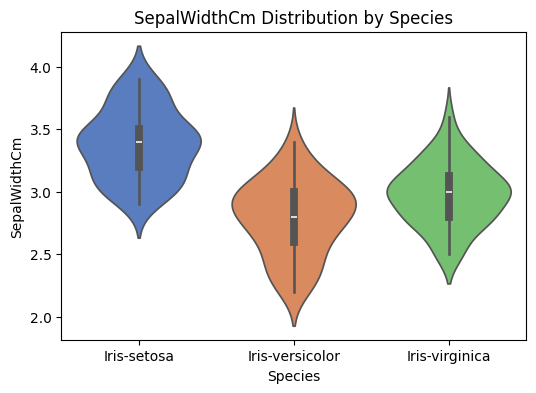

C:\Users\nanda\AppData\Local\Temp\ipykernel_2888\2435968319.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sls.violinplot(data=cleaneddata_no_outliers, x='Species', y=column, palette='muted')


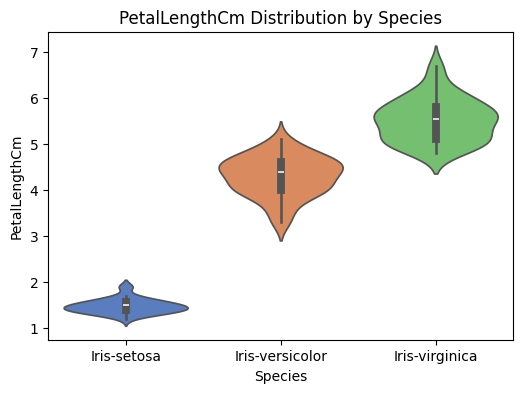

C:\Users\nanda\AppData\Local\Temp\ipykernel_2888\2435968319.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sls.violinplot(data=cleaneddata_no_outliers, x='Species', y=column, palette='muted')


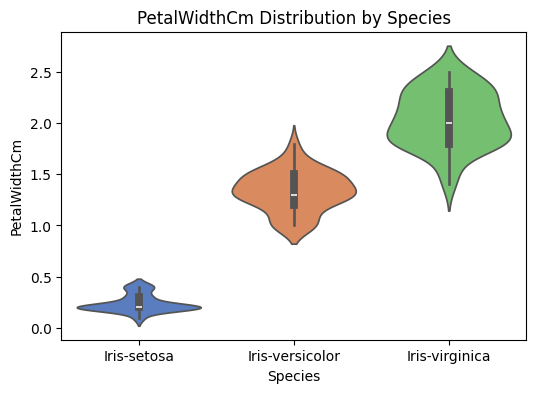

In [91]:
for column in ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']:
    pls.figure(figsize=(6, 4))
    sls.violinplot(data=cleaneddata_no_outliers, x='Species', y=column, palette='muted')
    pls.title(f'{column} Distribution by Species')
    pls.show()


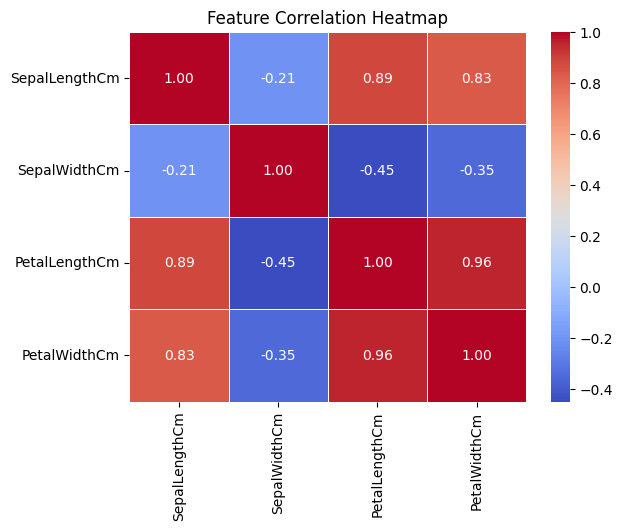

In [93]:
sls.heatmap(cleaneddata_no_outliers.drop('Species', axis=1).corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
pls.title("Feature Correlation Heatmap")
pls.show()


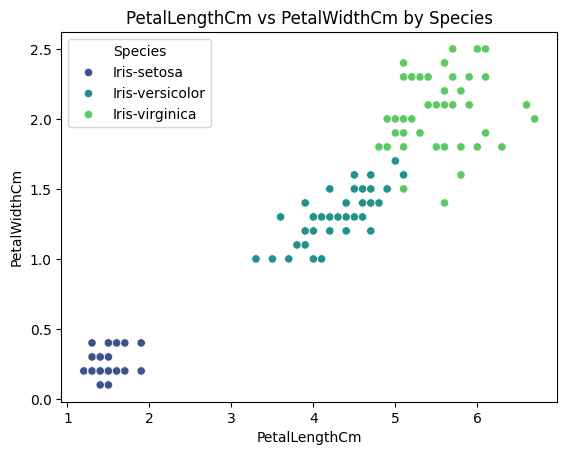

In [95]:
sls.scatterplot(data=cleaneddata_no_outliers, x='PetalLengthCm', y='PetalWidthCm', hue='Species', palette='viridis')
pls.title("PetalLengthCm vs PetalWidthCm by Species")
pls.show()


C:\Users\nanda\AppData\Local\Temp\ipykernel_2888\151784896.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sls.countplot(data=cleaneddata_no_outliers, x='Species', palette='pastel')


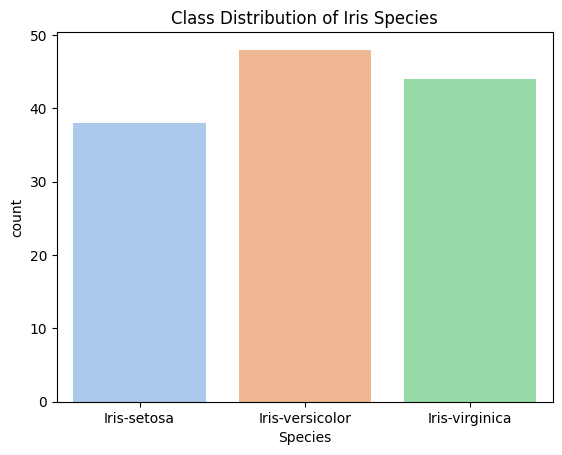

In [97]:
sls.countplot(data=cleaneddata_no_outliers, x='Species', palette='pastel')
pls.title("Class Distribution of Iris Species")
pls.show()


In [98]:
finaldata.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,130.000000,130.000000,130.000000,130.000000
mean,5.886154,3.027692,3.890000,1.253846
std,0.783923,0.365364,1.682599,0.745649
min,4.400000,2.200000,1.200000,0.100000
25%,5.200000,2.800000,1.600000,0.400000
50%,5.900000,3.000000,4.450000,1.400000
75%,6.400000,3.200000,5.100000,1.800000
max,7.700000,3.900000,6.700000,2.500000


In [100]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [101]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Prepare features (X) and target (y)
X = cleaneddata_no_outliers[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = cleaneddata_no_outliers['Species']

# Encode target labels to numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)


In [102]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [103]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Model Accuracy: 96.15%
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.90      1.00      0.95         9
 Iris-virginica       1.00      0.89      0.94         9

       accuracy                           0.96        26
      macro avg       0.97      0.96      0.96        26
   weighted avg       0.97      0.96      0.96        26



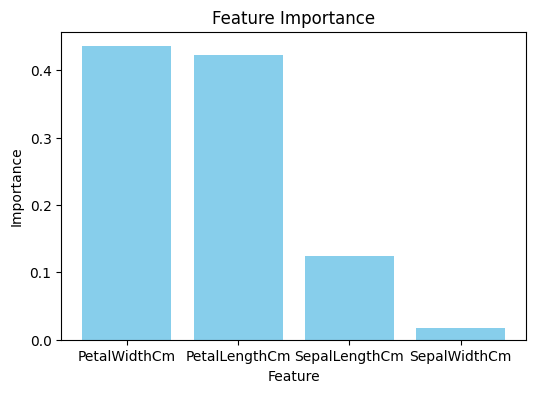

In [104]:
# Feature Importance
import pandas as pd
import matplotlib.pyplot as plt

feature_importances = rf_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(6, 4))
plt.bar(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.title('Feature Importance')
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.show()


In [105]:


from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression
logistic_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)

# Train the model
logistic_model.fit(X_train, y_train)

# Predict on the test set
y_pred = logistic_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy * 100:.2f}%")

# Classification Report
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Logistic Regression Accuracy: 96.15%
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.90      1.00      0.95         9
 Iris-virginica       1.00      0.89      0.94         9

       accuracy                           0.96        26
      macro avg       0.97      0.96      0.96        26
   weighted avg       0.97      0.96      0.96        26



C:\Users\nanda\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
